# Concrete ML Scalability

## Imports

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from concrete.ml.sklearn import LogisticRegression, RandomForestClassifier, XGBClassifier, NeuralNetClassifier

## Create Datasets

In [2]:
# Create a synthetic dataset
observation_sizes = [503, 1003, 5003, 10003]
feature_sizes = [10, 100, 1000]

datasets = []

# Create datasets with different sizes
for n_obs in observation_sizes:
    for n_feat in feature_sizes:
        X, y = make_classification(n_samples=n_obs, n_features=n_feat)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=3)
        datasets.append((x_train, x_test, y_train, y_test))

## Benchmark

In [3]:
n_bits = 2

In [4]:
results = {'n_obs': [], 'n_feat': [], 'clf': [], 'eval_total': [], 'eval_single': []}

# Train and evaluate the models
for split in datasets:
    x_train, x_test, y_train, y_test = split
    for clf in [LogisticRegression, RandomForestClassifier, XGBClassifier, NeuralNetClassifier]:
        # Print the current model
        print(f"Training and evaluating {clf.__name__} with {x_train.shape[0]} observations and {x_train.shape[1]} features")
        # Initialize the model
        if clf.__name__ == 'NeuralNetClassifier':
            model = clf(verbose=0, **{'module__n_layers': 2, 'module__n_w_bits': n_bits, 'module__n_a_bits': n_bits})
        else:
            model = clf(n_bits=n_bits)
        # Train the model
        model.fit(x_train, y_train)
        # Evaluate the model
        model.compile(x_train)
        # Evaluate the model
        start_time = time.time()
        y_pred = model.predict(x_test, fhe='execute')
        eval_total = time.time() - start_time
        # Save the results
        results['n_obs'].append(x_train.shape[0])
        results['n_feat'].append(x_train.shape[1])
        results['clf'].append(clf.__name__)
        results['eval_total'].append(eval_total)
        results['eval_single'].append(eval_total / len(y_test))

Training and evaluating LogisticRegression with 500 observations and 10 features
Training and evaluating RandomForestClassifier with 500 observations and 10 features
Training and evaluating XGBClassifier with 500 observations and 10 features
Training and evaluating NeuralNetClassifier with 500 observations and 10 features
Training and evaluating LogisticRegression with 500 observations and 100 features
Training and evaluating RandomForestClassifier with 500 observations and 100 features
Training and evaluating XGBClassifier with 500 observations and 100 features
Training and evaluating NeuralNetClassifier with 500 observations and 100 features
Training and evaluating LogisticRegression with 500 observations and 1000 features
Training and evaluating RandomForestClassifier with 500 observations and 1000 features
Training and evaluating XGBClassifier with 500 observations and 1000 features
Training and evaluating NeuralNetClassifier with 500 observations and 1000 features
Training and eva

# Evaluate

In [5]:
# results to dataframe
df = pd.DataFrame(results)
df

,n_obs,n_feat,clf,eval_total,eval_single
0,500,10,LogisticRegression,0.002130,0.000710
1,500,10,RandomForestClassifier,8.664300,2.888100
2,500,10,XGBClassifier,3.436422,1.145474
3,500,10,NeuralNetClassifier,3.034781,1.011594
4,500,100,LogisticRegression,0.005394,0.001798
5,500,100,RandomForestClassifier,8.850328,2.950109
6,500,100,XGBClassifier,3.219304,1.073101
7,500,100,NeuralNetClassifier,22.069388,7.356463
8,500,1000,LogisticRegression,0.050485,0.016828
9,500,1000,RandomForestClassifier,11.166025,3.722008


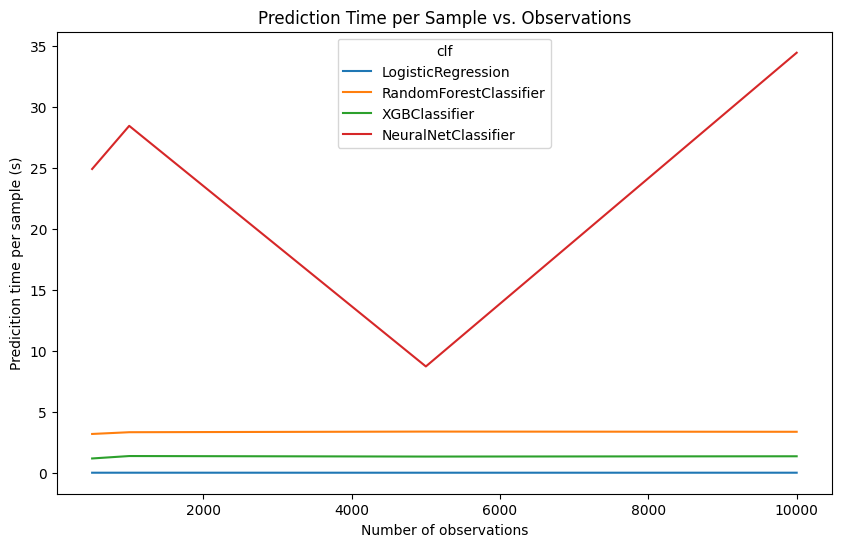

In [6]:
# evaluation time per sample n_obs
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='n_obs', y='eval_single', hue='clf', ci=None)
plt.xlabel('Number of observations')
plt.ylabel('Predicition time per sample (s)')
plt.title('Prediction Time per Sample vs. Observations')
plt.show()

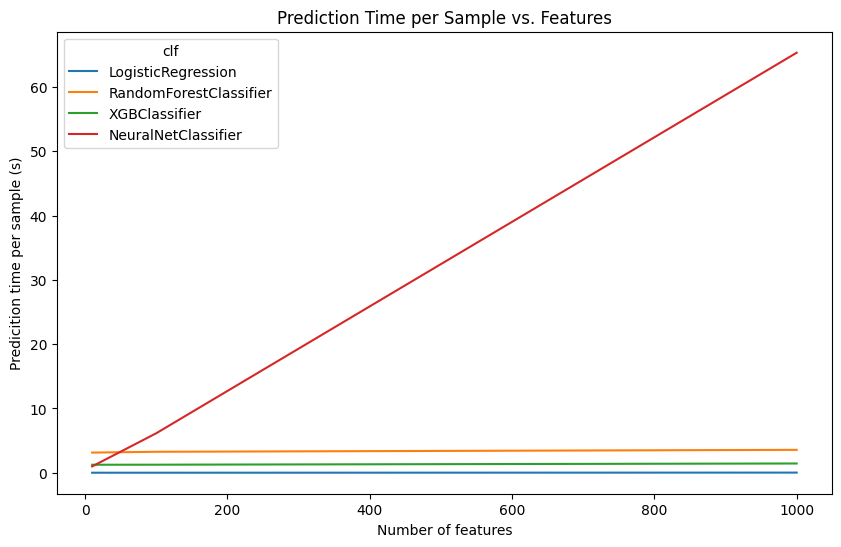

In [7]:
# evaluation time per sample n_feat
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='n_feat', y='eval_single', hue='clf', ci=None)
plt.xlabel('Number of features')
plt.ylabel('Predicition time per sample (s)')
plt.title('Prediction Time per Sample vs. Features')
plt.show()

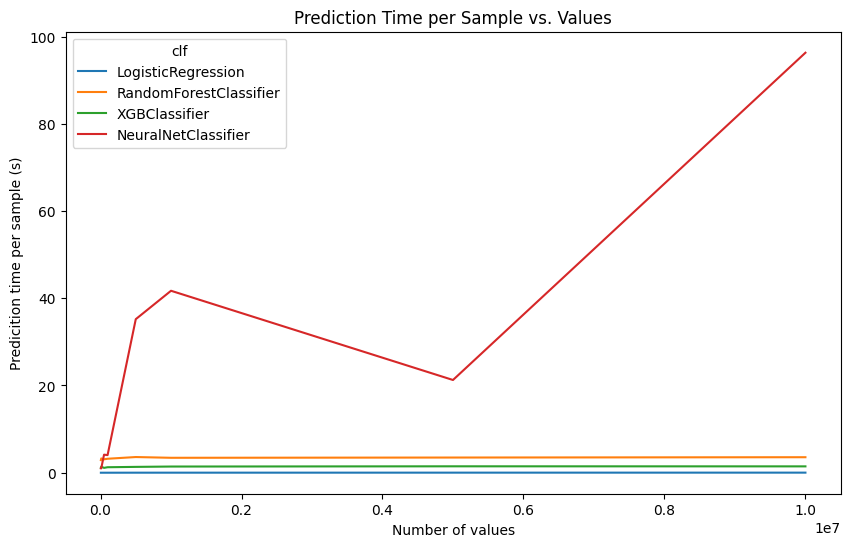

In [8]:
# evaluation time per sample n_obs * n_feat
df['n_values'] = df['n_obs'] * df['n_feat']
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='n_values', y='eval_single', hue='clf', ci=None)
plt.xlabel('Number of values')
plt.ylabel('Predicition time per sample (s)')
plt.title('Prediction Time per Sample vs. Values')
plt.show()